In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 123MB/s]


In [ ]:
import zipfile 

with zipfile.ZipFile('/content/nlp-getting-started.zip', 'r') as data:
  data.extractall('/content/data')

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-04 14:58:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-04 14:58:43 (76.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Visualizing a text dataset
import pandas as pd

In [ ]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head() 

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
#What does a text dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many examples of class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else "(not real disaster)")
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 0 (not real disaster)
Text:
The @rbcinsurance quote website = disaster. Tried 3 browsers &amp; 3 machines. Always get 'Missing Info' error due to a non-existant drop down.

---

Target: 1 (real disaster)
Text:
4 dead dozens injured in Gaza blast near house leveled in summer war - Washington Post  http://t.co/AXXDCaKzTY #World

---

Target: 0 (not real disaster)
Text:
RT @tonyhsieh: 'The person who dances with you in the rain will most likely walk with you in the storm.' -Anonymous

---

Target: 0 (not real disaster)
Text:
Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 77

---

Target: 0 (not real disaster)
Text:
Ted Cruz fires back at Jeb &amp; Bush: ÛÏWe lose because of Republicans like Jeb &amp; Mitt.Û [Video] -  http://t.co/BFTHaHLCr0

---



In [ ]:
# Split data into training and validation dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #use 10% for validation split
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

###**Creating a Tokenization**

In [ ]:
# Converting text into numbers using tokenization (Text vectorization)
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
from pandas.core.common import standardize_mapping
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # How many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace", # Split words by space
                                    ngrams=None, # Create groups of n-words
                                    output_mode="int", # How to map tokens to numbers
                                    output_sequence_length = None, # how long do you want your sequences to be?
                                    pad_to_max_tokens=False)

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # Max number of words to have in our vocabulary
max_length = 15 # Max length our sequnces will be (e.g how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length,
                                    pad_to_max_tokens=True)

In [ ]:
# Fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\n\nVectorized version")
text_vectorizer([random_sentence])

Original text:
 @MistressPip I'm amazed you have not been inundated mistress.

Vectorized version


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,  32,   1,  12,  24,  34,  59, 507,   1,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # Get the most words
bottom_5_words = words_in_vocab[-5:] # Get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### **Creating an Embedding using an Embedding Layer**

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedded vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             embeddings_initializer="uniform",
                             input_length=max_length # How long each input is
                             )

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")
#Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @abcnews A nuclear bomb is a terrible weapon!!      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00139808,  0.0149509 ,  0.0112424 , ...,  0.039124  ,
          0.04808127, -0.02905122],
        [ 0.01127641, -0.01716474,  0.0145101 , ...,  0.02522102,
          0.03412703, -0.03438784],
        [-0.03222014,  0.02865367, -0.02690721, ..., -0.00998354,
          0.02382794, -0.00742344],
        ...,
        [-0.03316883,  0.00834409, -0.03312489, ..., -0.04754315,
          0.04567051,  0.01125991],
        [-0.03316883,  0.00834409, -0.03312489, ..., -0.04754315,
          0.04567051,  0.01125991],
        [-0.03316883,  0.00834409, -0.03312489, ..., -0.04754315,
          0.04567051,  0.01125991]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00139808,  0.0149509 ,  0.0112424 , -0.00028478,  0.02139838,
         0.01149471, -0.04550046,  0.00166316, -0.02595401,  0.01655148,
         0.01493764, -0.03932613, -0.03537035, -0.00388496,  0.03705777,
        -0.00059625, -0.04977293, -0.00785143,  0.00669362, -0.01270157,
        -0.04028604, -0.03909478, -0.0339434 , -0.01610255,  0.03262153,
         0.01087911,  0.00241563,  0.00726486, -0.04225221,  0.03576789,
         0.04515335, -0.0005051 , -0.03577537, -0.03569006,  0.04764357,
         0.04820139,  0.01597405,  0.00877146,  0.00457153, -0.02181919,
         0.01649021, -0.01653936, -0.04513667, -0.00067409, -0.04988798,
         0.04732056, -0.03345592,  0.04327866, -0.04212359,  0.00719696,
        -0.01480407, -0.00026495, -0.00594806,  0.01673048,  0.01552106,
         0.00380768,  0.02797597, -0.02792341, -0.03525795,  0.02020236,
         0.02074139, -0.03231917,  0.01383617, -0.01646634, -0.03956778,
  

##**Modelling a text dataset (running a series of experiments)**

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML map: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using tranfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of this?

Use the standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evauate a model



##Model 0

In [ ]:
# Model 0: Getting a baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline 
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
                    ("clf", MultinomialNB()), # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
print(val_sentences[:10])
baseline_preds[:10]

['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5'
 'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday'
 'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj'
 '@camilacabello97 Internally and externally screaming'
 'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov'
 'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8'
 'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd'
 "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by S\x89Û_ http://t.co/JDVSGVhlIs"
 '\x89Ûª93 blas

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
# Creating an evaluation function for our model experiments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1":model_f1}
  return model_results

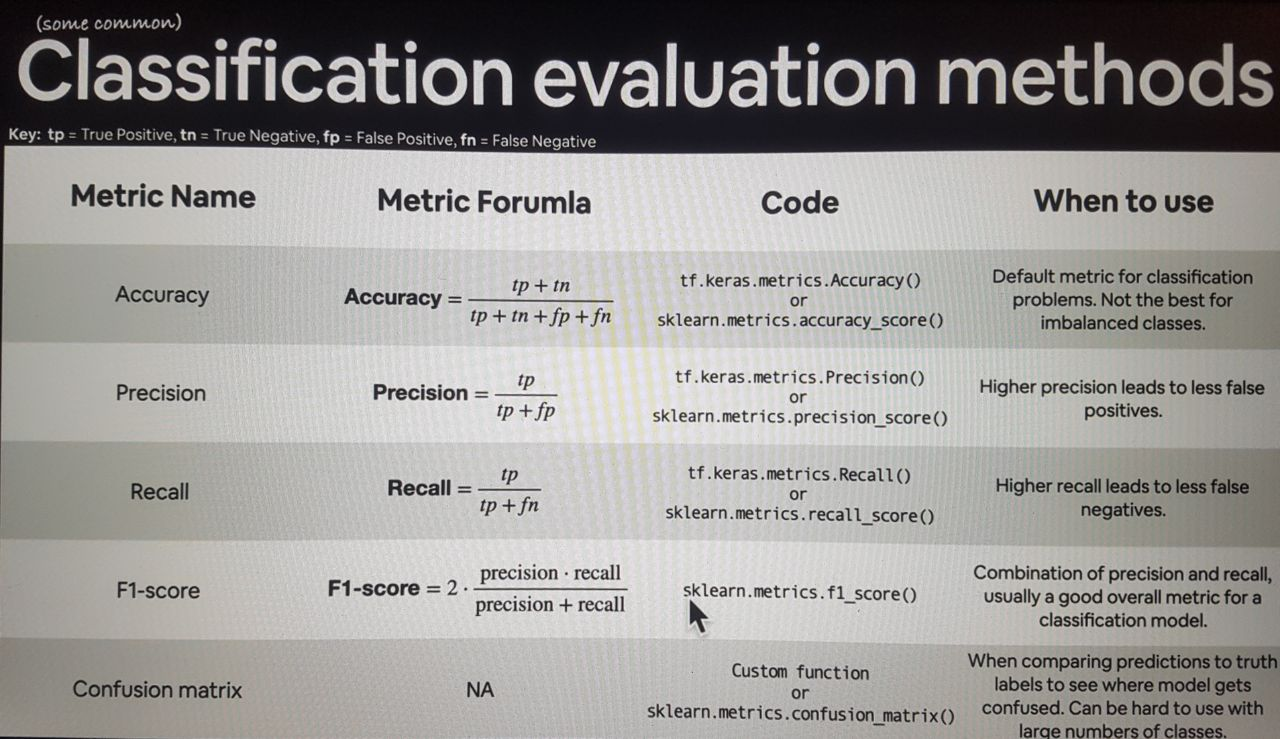

In [ ]:
baseline_results = calculate_results(y_true=val_labels, 
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Model 1: Dense model

In [ ]:
!mkdir model_logs

In [ ]:
# Create a tensorboard callback (need to create new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs
SAVE_DIR ="/content/model_logs"

In [ ]:
# Build model with Functional API
from tensorflow.keras.layers import Input, Dense
inputs = Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x)
outputs = Dense(1, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: /content/model_logs/model_1_dense/20220604-145855
Epoch 1/5
215/215 [==============================] - 10s 11ms/step - loss: 0.6130 - accuracy: 0.6834 - val_loss: 0.5350 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4431 - accuracy: 0.8143 - val_loss: 0.4704 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3487 - accuracy: 0.8619 - val_loss: 0.4560 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2851 - accuracy: 0.8897 - val_loss: 0.4636 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2390 - accuracy: 0.9098 - val_loss: 0.4868 - val_accuracy: 0.7887


In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
val_sentences[:10]

array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
       'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
       'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
       '@camilacabello97 Internally and externally screaming',
       'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
       'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
       'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
       "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern C

In [ ]:
model_1_pred_probs[:10]

array([[0.32963762],
       [0.78082854],
       [0.99718374],
       [0.09400803],
       [0.11013547],
       [0.93221694],
       [0.90730166],
       [0.9930199 ],
       [0.96359015],
       [0.21999726]], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label forms
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true= val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'f1': 0.7850561936710079,
 'precision': 0.7958623979922417,
 'recall': 0.7887139107611548}

##Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (These are the numerical representations of each token in our training data)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent out tokens, let's see how we can visualize it.

To do so, Tensorflow has a handy tool called projector: https://projector.tensorflow.org/

And Tensorflow also has an incredible guide on word embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
# Create embedding files (we got this from TensorFlow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector
# from google.colab import files
# try:
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Network (RNN's)

RNN's are useful for sequence data.

The premise of recurrent neural network is to use the representation of a previous input to aid the representation of a later input



## Model 2: LSTM

LSTM = long short term memory (one of the most LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(units=64, return_sequences=True)(x) # when you're creating multilayered RNNs you need to set return_sequences=True
print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

(None, 15, 64)


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_2_history = model_2.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: /content/model_logs/model_2_LSTM/20220604-145916
Epoch 1/5
215/215 [==============================] - 9s 13ms/step - loss: 0.2249 - accuracy: 0.9216 - val_loss: 0.6075 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1611 - accuracy: 0.9399 - val_loss: 0.6081 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1324 - accuracy: 0.9523 - val_loss: 0.7395 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1081 - accuracy: 0.9574 - val_loss: 0.8551 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0846 - accuracy: 0.9675 - val_loss: 1.0227 - val_accuracy: 0.7703


In [ ]:
# make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[5.0874893e-03],
       [8.4920359e-01],
       [9.9997509e-01],
       [2.1882206e-02],
       [1.7788500e-04],
       [9.9970347e-01],
       [9.5728260e-01],
       [9.9998939e-01],
       [9.9996471e-01],
       [7.5233477e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.03412073490814,
 'f1': 0.7683227325217538,
 'precision': 0.7718252603398367,
 'recall': 0.7703412073490814}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has simillar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64, return_sequences=True)(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
print(x.shape)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

(None, 15, 128)
(None, 15, 64)
(None, 15, 64)
(None, 64)
(None, 64)


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: /content/model_logs/model_3_GRU/20220604-145944
Epoch 1/5
215/215 [==============================] - 12s 19ms/step - loss: 0.1407 - accuracy: 0.9543 - val_loss: 0.9921 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0814 - accuracy: 0.9686 - val_loss: 1.0159 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0613 - accuracy: 0.9731 - val_loss: 1.3271 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0566 - accuracy: 0.9753 - val_loss: 1.5077 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0571 - accuracy: 0.9749 - val_loss: 1.2957 - val_accuracy: 0.7612


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[1.5768569e-02],
       [6.4103407e-01],
       [9.9997866e-01],
       [2.6465341e-01],
       [3.2938980e-05],
       [9.9978846e-01],
       [9.5101184e-01],
       [9.9998713e-01],
       [9.9997449e-01],
       [8.1766385e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.11548556430446,
 'f1': 0.758712452353006,
 'precision': 0.763026475717381,
 'recall': 0.7611548556430446}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

In [ ]:
# Build a bidirectional RNN in Tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(x=train_sentences,
            y = train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: /content/model_logs/model_4_bidirectional/20220604-150014
Epoch 1/5
215/215 [==============================] - 8s 19ms/step - loss: 0.1183 - accuracy: 0.9599 - val_loss: 0.9888 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0573 - accuracy: 0.9742 - val_loss: 1.2901 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0474 - accuracy: 0.9791 - val_loss: 1.1757 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0411 - accuracy: 0.9793 - val_loss: 1.3783 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0469 - accuracy: 0.9783 - val_loss: 1.4475 - val_accuracy: 0.7651


In [ ]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[6.7723893e-02],
       [6.4281386e-01],
       [9.9997878e-01],
       [1.4742248e-01],
       [1.9862800e-05],
       [9.9991429e-01],
       [9.9552131e-01],
       [9.9999249e-01],
       [9.9998164e-01],
       [9.9698764e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'f1': 0.7635213723925918,
 'precision': 0.7656343373801384,
 'recall': 0.7650918635170604}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##1D Convolutional Neural Network (CNN)

In common we use CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.

We use Conv2D for image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

## Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["This is a test sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,
                        activation="relu",
                        padding="valid")
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01422715,  0.01592919,  0.00805133, ...,  0.02058767,
         -0.0359165 , -0.05098207],
        [ 0.09583382, -0.00325323,  0.0432438 , ...,  0.02198573,
         -0.00982589, -0.07383423],
        [ 0.05089462, -0.00549821,  0.01970667, ...,  0.00307261,
          0.07138769, -0.06328355],
        ...,
        [ 0.01680666,  0.00911546, -0.01436433, ..., -0.02763506,
          0.03842492, -0.0076118 ],
        [ 0.01680666,  0.00911546, -0.01436433, ..., -0.02763506,
          0.03842492, -0.0076118 ],
        [ 0.01680666,  0.00911546, -0.01436433, ..., -0.02763506,
          0.03842492, -0.0076118 ]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.05743292, 0.03514693, 0.        ,
         0.11649044, 0.02779329, 0.06079919, 0.        , 0.        ,
         0.        , 0.00662985, 0.        , 0.08363612, 0.00672275,
         0.        , 0.        , 0.02069202, 0.01222719, 0.03766919,
         0.06152037, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.02587861, 0.        , 0.07719269, 0.00619309,
         0.        , 0.        ],
        [0.        , 0.02313489, 0.        , 0.05500063, 0.        ,
         0.        , 0.        , 0.        , 0.02017223, 0.05381431,
         0.        , 0.        , 0.0226198 , 0.04498129, 0.        ,
         0.        , 0.        , 0.0735977 , 0.        , 0.07596835,
         0.07665594, 0.        , 0.        , 0.        , 0.00272334,
         0.01907444, 0.        , 0.05793615, 0.02823609, 0.01345573,
         0.09024046, 0.        ],
        [0.04865848, 0.        , 0.        , 0.    

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.04865848, 0.03335775, 0.05743292, 0.066403  , 0.07200813,
        0.11649044, 0.02779329, 0.06079919, 0.06719931, 0.05381431,
        0.        , 0.01703105, 0.04165024, 0.08400809, 0.03633658,
        0.03087354, 0.04958484, 0.0735977 , 0.02095456, 0.07596835,
        0.07665594, 0.        , 0.        , 0.00414026, 0.00272334,
        0.07186981, 0.05325432, 0.05793615, 0.07719269, 0.01345573,
        0.09024046, 0.01223699]], dtype=float32)>

In [ ]:
# Build a Conv1D model in Tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                        kernel_size=5,
                        strides=1,
                        activation="relu",
                        padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(x=train_sentences,
            y = train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_5_conv1d")])

Saving TensorBoard log files to: /content/model_logs/model_5_conv1d/20220604-150045
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1271 - accuracy: 0.9587 - val_loss: 0.8728 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9704 - val_loss: 0.9787 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.9753 - val_loss: 1.1214 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0551 - accuracy: 0.9768 - val_loss: 1.1590 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0515 - accuracy: 0.9777 - val_loss: 1.1943 - val_accuracy: 0.7651


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.5388265e-01],
       [6.4802188e-01],
       [9.9975330e-01],
       [4.8578735e-02],
       [8.5711093e-08],
       [9.9809700e-01],
       [9.5723563e-01],
       [9.9995697e-01],
       [9.9999785e-01],
       [8.1348425e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 78.87139107611549,
 'f1': 0.7850561936710079,
 'precision': 0.7958623979922417,
 'recall': 0.7887139107611548}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 6: Tensorflow Hub Pretrained Feature Extractor

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using Tensorflow Hub's Universal Sentence:
https://tfhub.dev/google/universal-sentence-encoder/4


In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embed_samples = embed([
    "How are you doing guys",
    "Alright, thanks"])

print(embed_samples[0][:50])

tf.Tensor(
[-0.00955968 -0.02069366  0.02895959 -0.03195841  0.03033749 -0.03369074
  0.0370409  -0.05940923 -0.03410084  0.0562449   0.01240402  0.01565332
 -0.0282279  -0.04369046  0.05569987 -0.09179341  0.00073456 -0.03529261
 -0.04244196 -0.05745114  0.09375221 -0.02376795 -0.02160378  0.00713499
 -0.04469683  0.02867096  0.00318188  0.04821961 -0.05888362  0.03403522
  0.0374193   0.0246493   0.03737752  0.02163684 -0.04623828  0.00070789
 -0.01205913 -0.06386765 -0.01501329 -0.01664967  0.0472138   0.04492283
  0.01359126 -0.00414116  0.03635148 -0.02437958 -0.08309639  0.03164092
  0.04046029  0.02810158], shape=(50,), dtype=float32)


In [ ]:
from os import name
# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
import tensorflow as tf
from tensorflow.keras import layers

model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: /content/model_logs/tf_hub_sentence_encoder/20220604-150116
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5043 - accuracy: 0.7831 - val_loss: 0.4504 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4145 - accuracy: 0.8142 - val_loss: 0.4406 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4012 - accuracy: 0.8212 - val_loss: 0.4400 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3925 - accuracy: 0.8270 - val_loss: 0.4293 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3859 - accuracy: 0.8300 - val_loss: 0.4270 - val_accuracy: 0.8123


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.18793273],
       [0.8368599 ],
       [0.99019617],
       [0.21896216],
       [0.77115506],
       [0.7557178 ],
       [0.9854305 ],
       [0.98175174],
       [0.95008904],
       [0.12384968]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 perfomance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'f1': 0.8115121319063344,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data

In [ ]:
## NOTE: Making data splits like below leadsto data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# # Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# # train_10_percent.head(), len(train_10_percent)

# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()

# len(train_sentences_10_percent), len(train_labels_10_percent)

🔑 **Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
import numpy as np

In [ ]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# Check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model the same as model_6
model_7 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: /content/model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20220604-150503
Epoch 1/5
22/22 [==============================] - 2s 45ms/step - loss: 0.6724 - accuracy: 0.6555 - val_loss: 0.6572 - val_accuracy: 0.6772
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6105 - accuracy: 0.8015 - val_loss: 0.6049 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5374 - accuracy: 0.8117 - val_loss: 0.5494 - val_accuracy: 0.7598
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4758 - accuracy: 0.8248 - val_loss: 0.5119 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4296 - accuracy: 0.8292 - val_loss: 0.4980 - val_accuracy: 0.7703


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.23010579],
       [0.5436843 ],
       [0.89629453],
       [0.3682716 ],
       [0.5358261 ],
       [0.65605205],
       [0.86600155],
       [0.7929896 ],
       [0.8256257 ],
       [0.1557572 ]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.03412073490814,
 'f1': 0.7688058109983439,
 'precision': 0.7709806133638261,
 'recall': 0.7703412073490814}

In [ ]:
model_6_results

{'accuracy': 81.23359580052494,
 'f1': 0.8115121319063344,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494}

## Comparing the performance of each of our model

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_LSTM": model_2_results,
                                  "3_GRU": model_3_results,
                                  "4_Bidirectional": model_5_results,
                                  "5_Conv1D:": model_5_results,
                                  "6_TF_Hub_USE_Encoder": model_6_results,
                                  "7_TF_Hub_USE_Encoder_10_percent_of_data": model_7_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.788714,0.795862,0.788714,0.785056
2_LSTM,0.770341,0.771825,0.770341,0.768323
3_GRU,0.761155,0.763026,0.761155,0.758712
4_Bidirectional,0.788714,0.795862,0.788714,0.785056
5_Conv1D:,0.788714,0.795862,0.788714,0.785056
6_TF_Hub_USE_Encoder,0.812336,0.812763,0.812336,0.811512
7_TF_Hub_USE_Encoder_10_percent_of_data,0.770341,0.770981,0.770341,0.768806


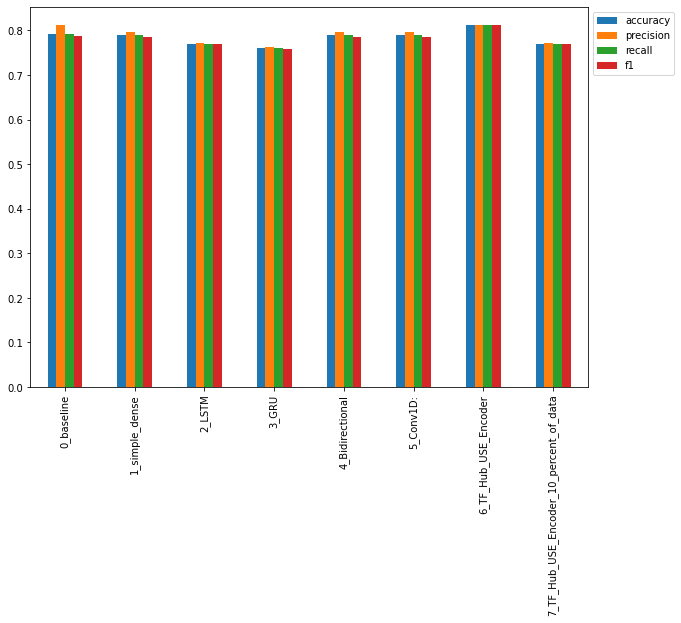

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));